![header](../figures/logos_partenaires._cmems_se.jpg)


<div class="alert alert-block alert-success">
<h1><center>Compare Roberts discontinuities </center></h1></div>

***
**Authors:**  Datlas, IGE, IMEDEA & CLS <br>
**Copyright:** 2022 Datlas, IGE, IMEDEA & CLS <br>
**License:** MIT

In [1]:
import numpy as np
import xarray as xr
import pathlib
import sys
import datetime 
import matplotlib.pyplot as plt

#import zcollection

from skimage import morphology, filters
import cv2

## 1. Set parameters

In [2]:
 
sys.path.append('..')
from src.dict_regions_info import *
region_info = RegionInfo('GS_info').region_info

orbit = '1d'

method_name = 'Gomez_V2'
method_name2 = 'UnetGomez'
var_name = 'ssha_gomezfilt'
var_name2 = 'ssha_unetgomezfilt'
path_data = '../denoised_data/swot_1j_share_GS_gomezfilt2_Unetgomezfilt.nc'

## 2. Open the data

In [3]:
ds = xr.open_mfdataset(path_data)

## 3. Apply Roberts discontinuity detection

### Raw SWOT data

In [4]:
ssh_filt = ds.ssha_new_editing.values
u_filt = np.gradient( np.gradient(ssh_filt, axis = 0), axis = 0 )
v_filt = np.gradient( np.gradient(ssh_filt, axis = 1), axis = 1 )
V_filt1 = np.sqrt(u_filt**2 + v_filt**2)
robert_ssh1 = filters.roberts(V_filt1)

mask1 = np.zeros_like(robert_ssh1)
mask1[np.where((robert_ssh1 >= 0.0025) | (V_filt1 >= 0.010))] = 1.
 

### Unet baseline data

In [5]:
ssh_filt = ds.ssha_denoised_unet.values
u_filt = np.gradient( np.gradient(ssh_filt, axis = 0), axis = 0 )
v_filt = np.gradient( np.gradient(ssh_filt, axis = 1), axis = 1 )
V_filt2 = np.sqrt(u_filt**2 + v_filt**2)
robert_ssh2 = filters.roberts(V_filt2)

mask2 = np.zeros_like(robert_ssh2)
mask2[np.where((robert_ssh2 >= 0.0025) | (V_filt2 >= 0.010))] = 1.
 

### Evaluated denoising data

In [18]:
ssh_filt = ds[var_name].values
u_filt = np.gradient( np.gradient(ssh_filt, axis = 0), axis = 0 )
v_filt = np.gradient( np.gradient(ssh_filt, axis = 1), axis = 1 )
V_filt3 = np.sqrt(u_filt**2 + v_filt**2)
robert_ssh3 = filters.roberts(V_filt3)

mask3 = np.zeros_like(robert_ssh3)
mask3[np.where((robert_ssh3 >= 0.0025) | (V_filt3 >= 0.010))] = 1.


### Evaluated denoising data2

In [13]:
ssh_filt = ds[var_name2].values
u_filt = np.gradient( np.gradient(ssh_filt, axis = 0), axis = 0 )
v_filt = np.gradient( np.gradient(ssh_filt, axis = 1), axis = 1 )
V_filt4 = np.sqrt(u_filt**2 + v_filt**2)
robert_ssh4 = filters.roberts(V_filt4)

mask4 = np.zeros_like(robert_ssh4)
mask4[np.where((robert_ssh4 >= 0.0025) | (V_filt4 >= 0.010))] = 1.


## 4. Plot one pass to visualize the discontinuities

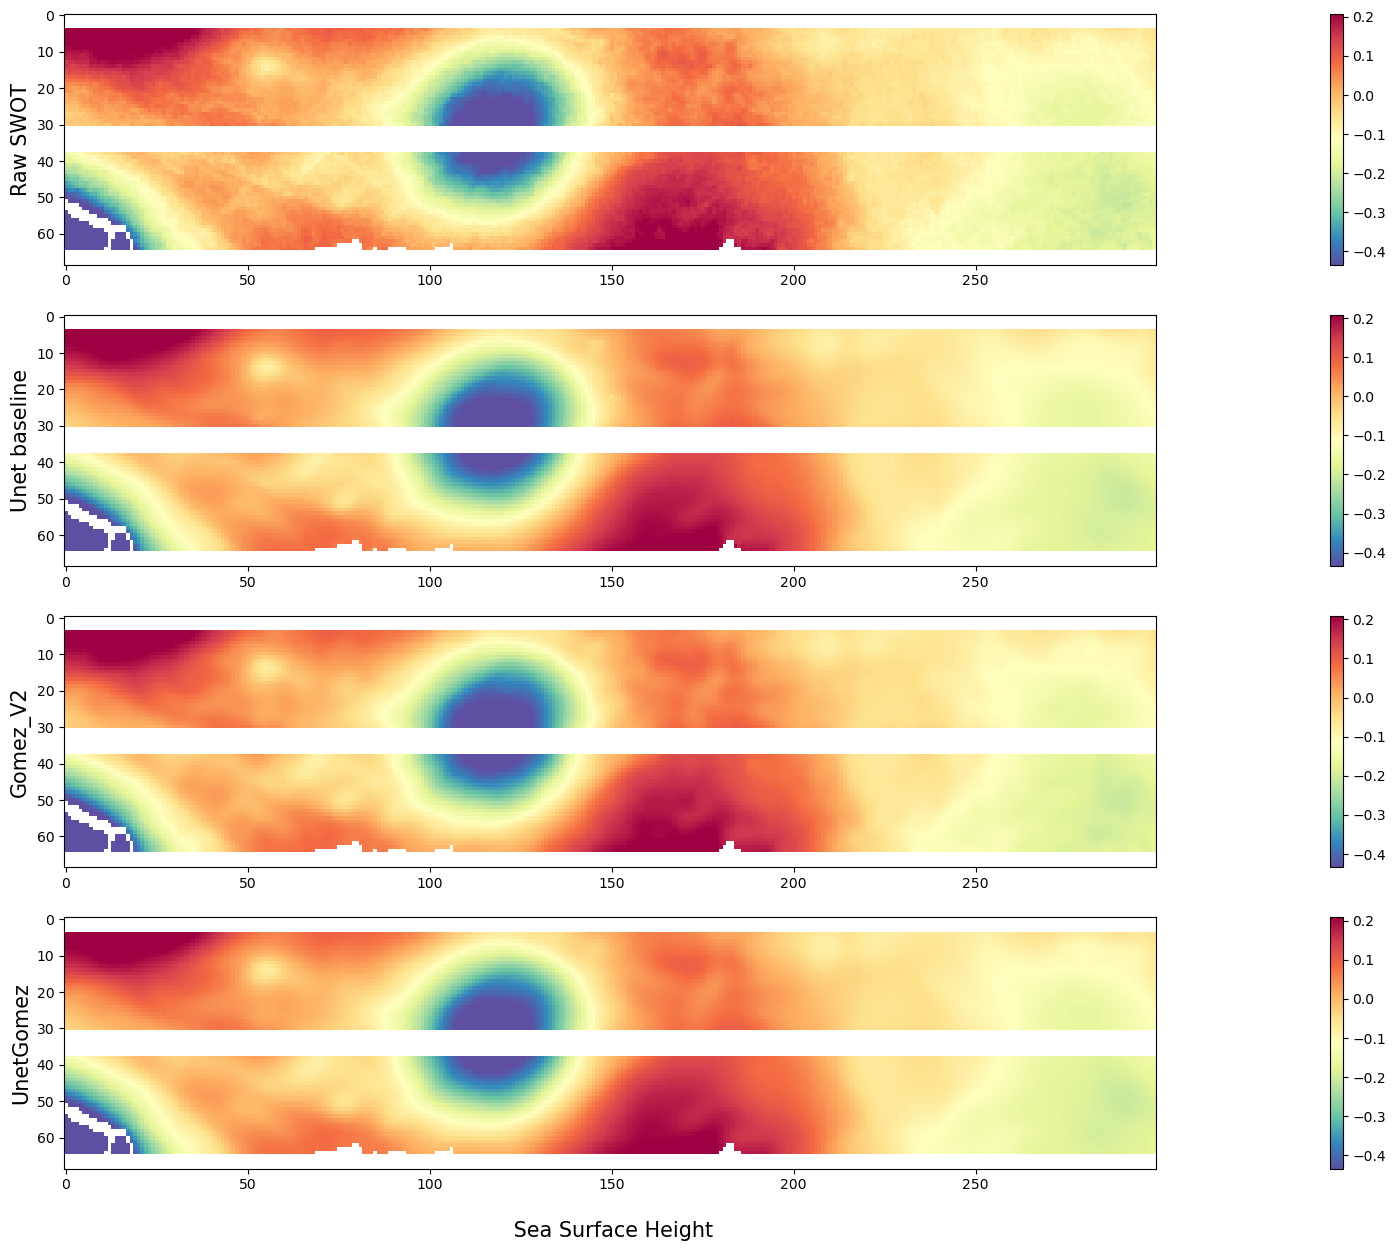

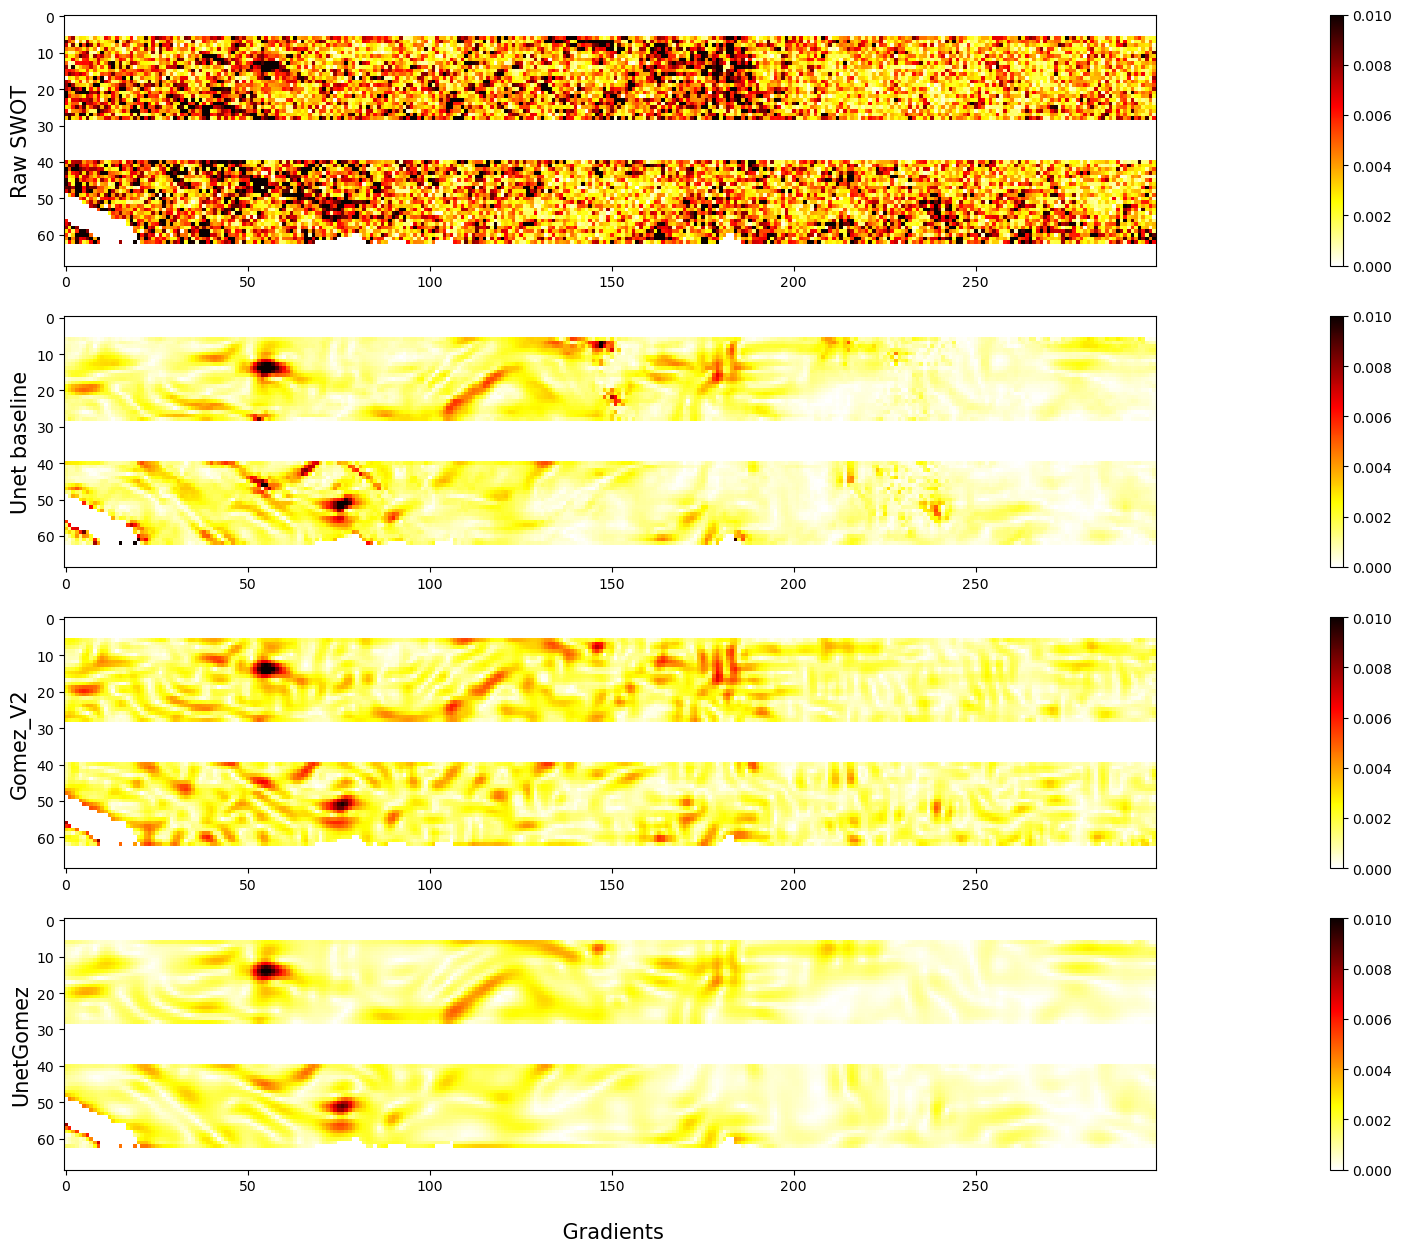

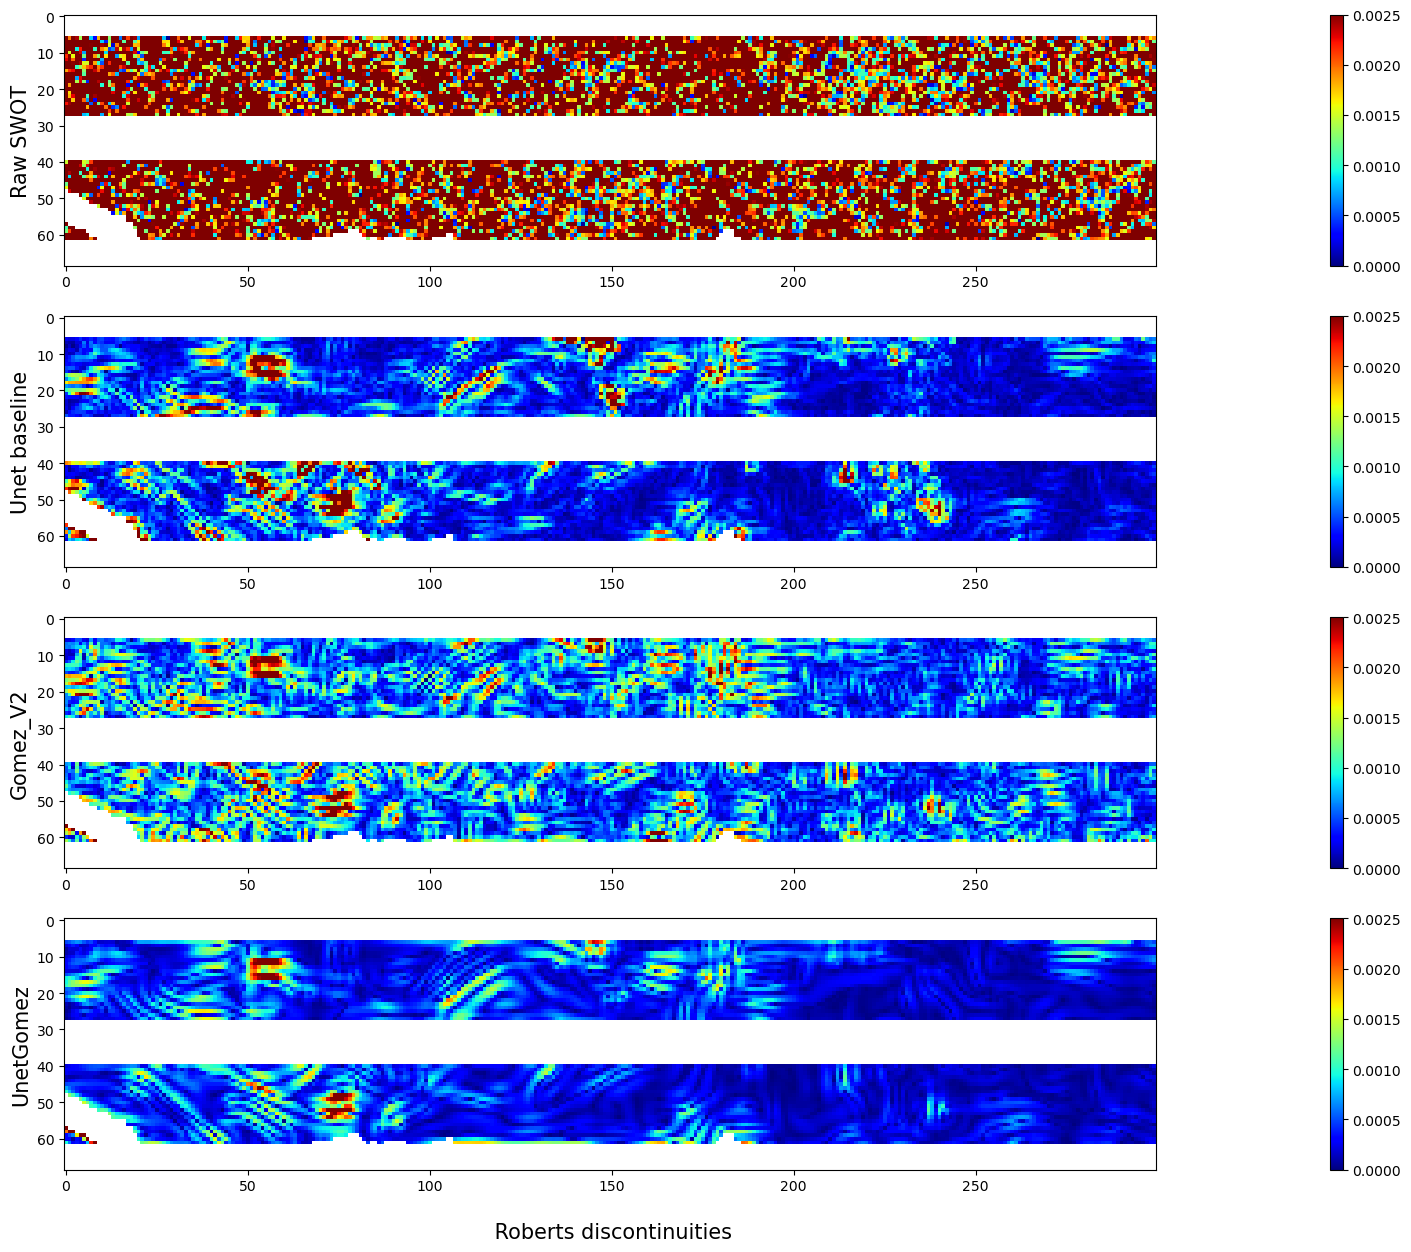

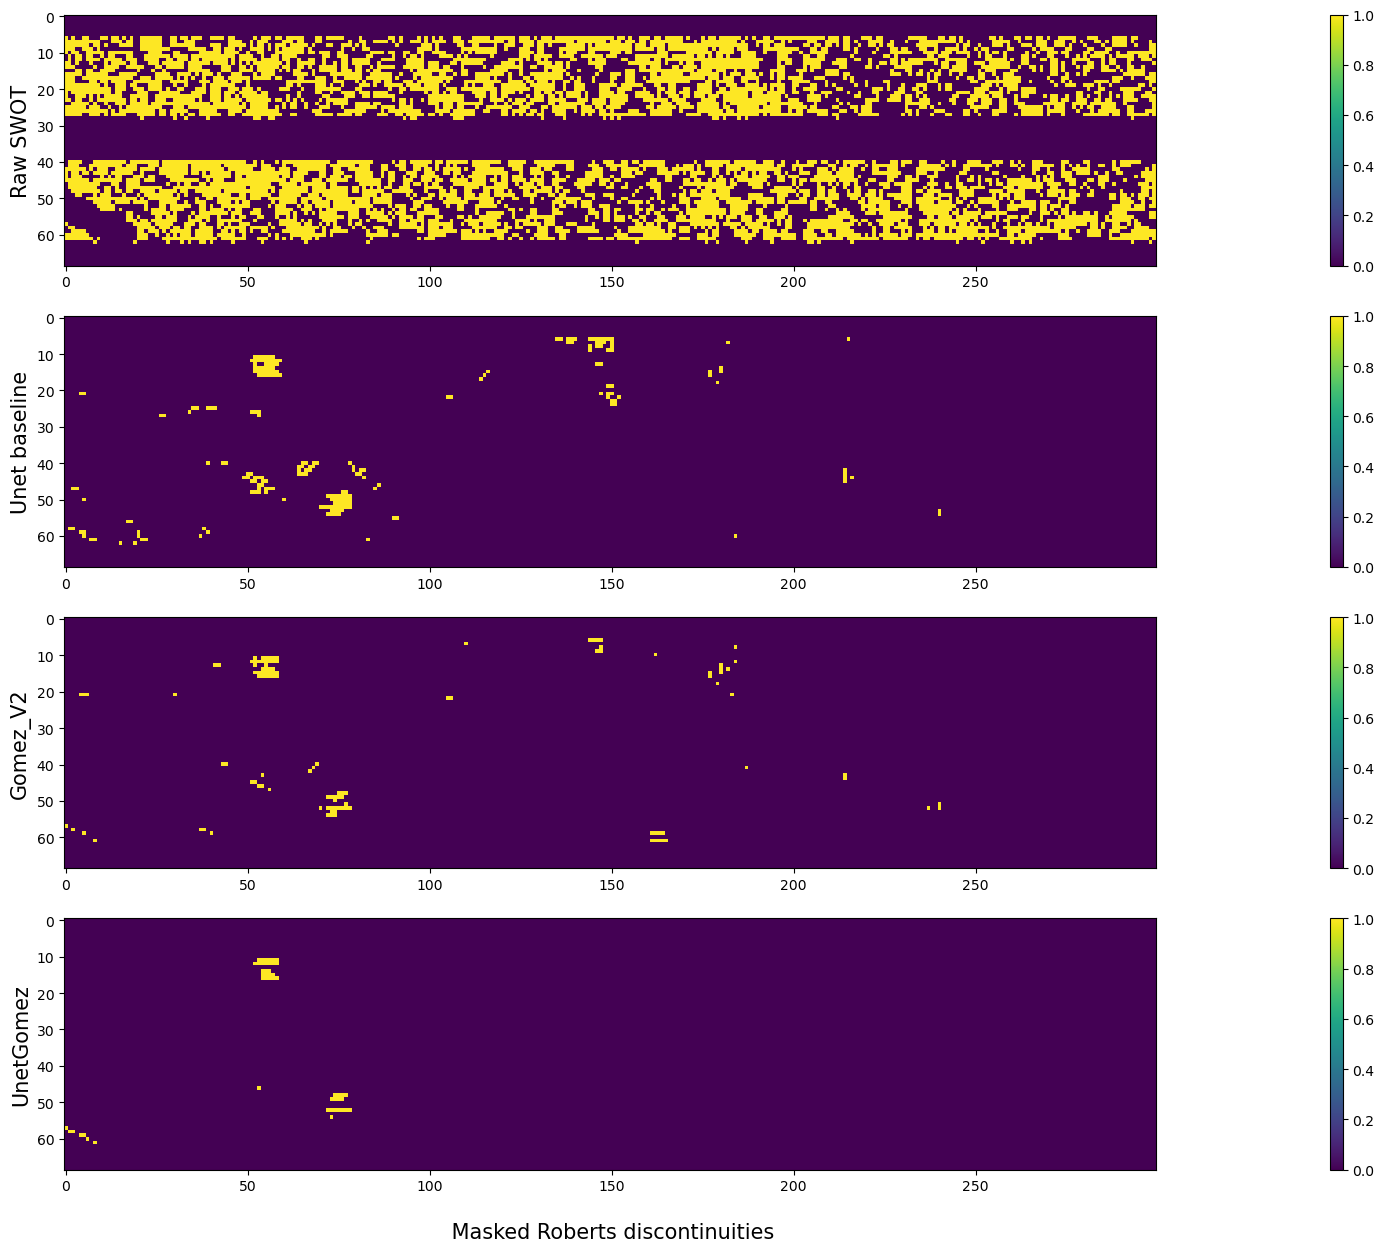

In [19]:
i0 = 10000
i1 = i0 + 300
  

vmin = np.nanquantile(ds.ssha_new_editing.values[i0:i1, :], 0.02)
vmax = np.nanquantile(ds.ssha_new_editing.values[i0:i1, :], 0.98)

plt.figure(figsize = (45, 15)) 
plt.subplot(4,1,1)
plt.imshow(ds.ssha_new_editing.values[i0:i1, :].T, cmap='Spectral_r', vmin = vmin, vmax = vmax )
plt.colorbar() 
plt.ylabel('Raw SWOT',fontsize=15)

plt.subplot(4,1,2)
plt.imshow(ds.ssha_denoised_unet.values[i0:i1, :].T, cmap='Spectral_r', vmin = vmin, vmax = vmax )
plt.colorbar() 
plt.ylabel('Unet baseline',fontsize=15)

plt.subplot(4,1,3)
plt.imshow(ds.ssha_gomezfilt.values[i0:i1, :].T, cmap='Spectral_r', vmin = vmin, vmax = vmax )
plt.colorbar()
plt.ylabel(method_name,fontsize=15)
plt.xlabel('\n Sea Surface Height',fontsize=15) 

plt.subplot(4,1,4)
plt.imshow(ds.ssha_unetgomezfilt.values[i0:i1, :].T, cmap='Spectral_r', vmin = vmin, vmax = vmax )
plt.colorbar()
plt.ylabel(method_name2,fontsize=15)
plt.xlabel('\n Sea Surface Height',fontsize=15)
plt.savefig('../figures/ssh_compare_'+region_info['name']+'_'+orbit+'.png',bbox_inches='tight')
plt.show()

vmin2 = 0
vmax2 = 0.010 #np.nanquantile(V_filt[i0:i1, :], 0.98)

plt.figure(figsize = (45, 15))  
plt.subplot(4,1,1)
plt.imshow(V_filt1[i0:i1, :].T, cmap='hot_r', vmin = vmin2, vmax = vmax2 )
plt.colorbar() 
plt.ylabel('Raw SWOT',fontsize=15)

plt.subplot(4,1,2)
plt.imshow(V_filt2[i0:i1, :].T, cmap='hot_r', vmin = vmin2, vmax = vmax2 )
plt.colorbar() 
plt.ylabel('Unet baseline',fontsize=15)

plt.subplot(4,1,3)
plt.imshow(V_filt3[i0:i1, :].T, cmap='hot_r', vmin = vmin2, vmax = vmax2 )
plt.colorbar()
plt.ylabel(method_name,fontsize=15)
plt.xlabel('\n Laplacian',fontsize=15)

plt.subplot(4,1,4)
plt.imshow(V_filt4[i0:i1, :].T, cmap='hot_r', vmin = vmin2, vmax = vmax2 )
plt.colorbar()
plt.ylabel(method_name2,fontsize=15)
plt.xlabel('\n Gradients',fontsize=15)
plt.savefig('../figures/grads_compare_'+region_info['name']+'_'+orbit+'.png',bbox_inches='tight')
plt.show() 


vmin3 = 0
vmax3 =0.0025

plt.figure(figsize = (45, 15))  
plt.subplot(4,1,1)
plt.imshow(robert_ssh1[i0:i1, :].T, cmap='jet', vmin = vmin3, vmax = vmax3)
plt.colorbar() 
plt.ylabel('Raw SWOT',fontsize=15)

plt.subplot(4,1,2)
plt.imshow(robert_ssh2[i0:i1, :].T, cmap='jet', vmin = vmin3, vmax = vmax3)
plt.colorbar() 
plt.ylabel('Unet baseline',fontsize=15)

plt.subplot(4,1,3)
plt.imshow(robert_ssh3[i0:i1, :].T, cmap='jet', vmin = vmin3, vmax = vmax3)
plt.colorbar()
plt.ylabel(method_name,fontsize=15)
plt.xlabel('\n Roberts discontinuities',fontsize=15)


plt.subplot(4,1,4)
plt.imshow(robert_ssh4[i0:i1, :].T, cmap='jet', vmin = vmin3, vmax = vmax3)
plt.colorbar()
plt.ylabel(method_name2,fontsize=15)
plt.xlabel('\n Roberts discontinuities',fontsize=15)
plt.savefig('../figures/roberts_compare_'+region_info['name']+'_'+orbit+'.png',bbox_inches='tight')
plt.show()

plt.figure(figsize = (45, 15))  
plt.subplot(4,1,1)
plt.imshow(mask1[i0:i1, :].T, cmap='viridis')
plt.colorbar() 
plt.ylabel('Raw SWOT',fontsize=15)

plt.subplot(4,1,2)
plt.imshow(mask2[i0:i1, :].T, cmap='viridis')
plt.colorbar() 
plt.ylabel('Unet baseline',fontsize=15)

plt.subplot(4,1,3)
plt.imshow(mask3[i0:i1, :].T, cmap='viridis')
plt.colorbar()
plt.ylabel(method_name,fontsize=15)
plt.xlabel('\n Masked Roberts discontinuities',fontsize=15)

plt.subplot(4,1,4)
plt.imshow(mask4[i0:i1, :].T, cmap='viridis')
plt.colorbar()
plt.ylabel(method_name2,fontsize=15)
plt.xlabel('\n Masked Roberts discontinuities',fontsize=15)
plt.savefig('../figures/maskedroberts_compare_'+region_info['name']+'_'+orbit+'.png',bbox_inches='tight')
plt.show()

## 5. Percentages of discontinuities in the data

In [26]:

print('Percentage of raw SWOT discontinuities:',np.sum(mask1)/np.size(mask1))
print('Percentage of Unet baseline discontinuities:',np.sum(mask2)/np.size(mask2))
print('Percentage of '+method_name+' discontinuities:',np.sum(mask3)/np.size(mask3))
print('Percentage of '+method_name2+' discontinuities:',np.sum(mask4)/np.size(mask4))

Percentage of raw SWOT discontinuities: 0.2931515750879265
Percentage of Unet baseline discontinuities: 0.0152824913022134
Percentage of Gomez_V2 discontinuities: 0.003729316817618028
Percentage of UnetGomez discontinuities: 0.0011680054261856145


## 6. Number of discontinuities in function of the SWH

In [27]:
swh_flag = ds.swh_model.values.copy()
swh_flag[mask1 == 0] = np.nan 
swh_flag = swh_flag[~np.isnan(swh_flag)]
hist_flag1 = np.histogram(swh_flag, bins = np.arange(0, 10.8, 0.1)) 

swh_flag = ds.swh_model.values.copy()
swh_flag[mask2 == 0] = np.nan 
swh_flag = swh_flag[~np.isnan(swh_flag)]
hist_flag2 = np.histogram(swh_flag, bins = np.arange(0, 10.8, 0.1)) 

swh_flag = ds.swh_model.values.copy()
swh_flag[mask3 == 0] = np.nan 
swh_flag = swh_flag[~np.isnan(swh_flag)]
hist_flag3 = np.histogram(swh_flag, bins = np.arange(0, 10.8, 0.1)) 

swh_flag = ds.swh_model.values.copy()
swh_flag[mask4 == 0] = np.nan 
swh_flag = swh_flag[~np.isnan(swh_flag)]
hist_flag4 = np.histogram(swh_flag, bins = np.arange(0, 10.8, 0.1)) 

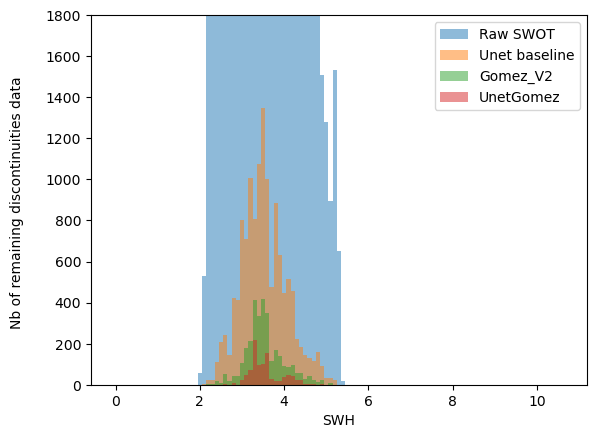

In [29]:
fig = plt.figure()
plt.bar(hist_flag1[1][:-1], hist_flag1[0], width=np.diff(hist_flag1[1]), alpha = 0.5, color = 'tab:blue', label='Raw SWOT') 
plt.bar(hist_flag2[1][:-1], hist_flag2[0], width=np.diff(hist_flag2[1]), alpha = 0.5, color = 'tab:orange', label='Unet baseline') 
plt.bar(hist_flag3[1][:-1], hist_flag3[0], width=np.diff(hist_flag3[1]), alpha = 0.5, color = 'tab:green', label=method_name) 
plt.bar(hist_flag4[1][:-1], hist_flag4[0], width=np.diff(hist_flag4[1]), alpha = 0.5, color = 'tab:red', label=method_name2) 

plt.ylim(0,1800)

plt.ylabel('Nb of remaining discontinuities data \n' ) 
plt.xlabel('SWH')
 
plt.legend()

plt.savefig('../figures/discontiSWH_compare_'+region_info['name']+'_'+orbit+'.png',bbox_inches='tight')
plt.show()

## 7. Spatial repartition of the discontinuities

In [30]:
import pyinterp
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [31]:
binning1 = pyinterp.Binning2D(
    pyinterp.Axis(np.arange(0, 360, 1), is_circle=True),
    pyinterp.Axis(np.arange(-90, 90, 1)))
binning1.clear()
binning1.push(ds.longitude, ds.latitude, mask1, True)

sum_mask1 = binning1.variable('sum')

binning2 = pyinterp.Binning2D(
    pyinterp.Axis(np.arange(0, 360, 1), is_circle=True),
    pyinterp.Axis(np.arange(-90, 90, 1)))
binning2.clear()
binning2.push(ds.longitude, ds.latitude, mask2, True)

sum_mask2 = binning2.variable('sum')

binning3 = pyinterp.Binning2D(
    pyinterp.Axis(np.arange(0, 360, 1), is_circle=True),
    pyinterp.Axis(np.arange(-90, 90, 1)))
binning3.clear()
binning3.push(ds.longitude, ds.latitude, mask3, True)

sum_mask3 = binning3.variable('sum')

binning4 = pyinterp.Binning2D(
    pyinterp.Axis(np.arange(0, 360, 1), is_circle=True),
    pyinterp.Axis(np.arange(-90, 90, 1)))
binning4.clear()
binning4.push(ds.longitude, ds.latitude, mask4, True)

sum_mask4 = binning4.variable('sum')

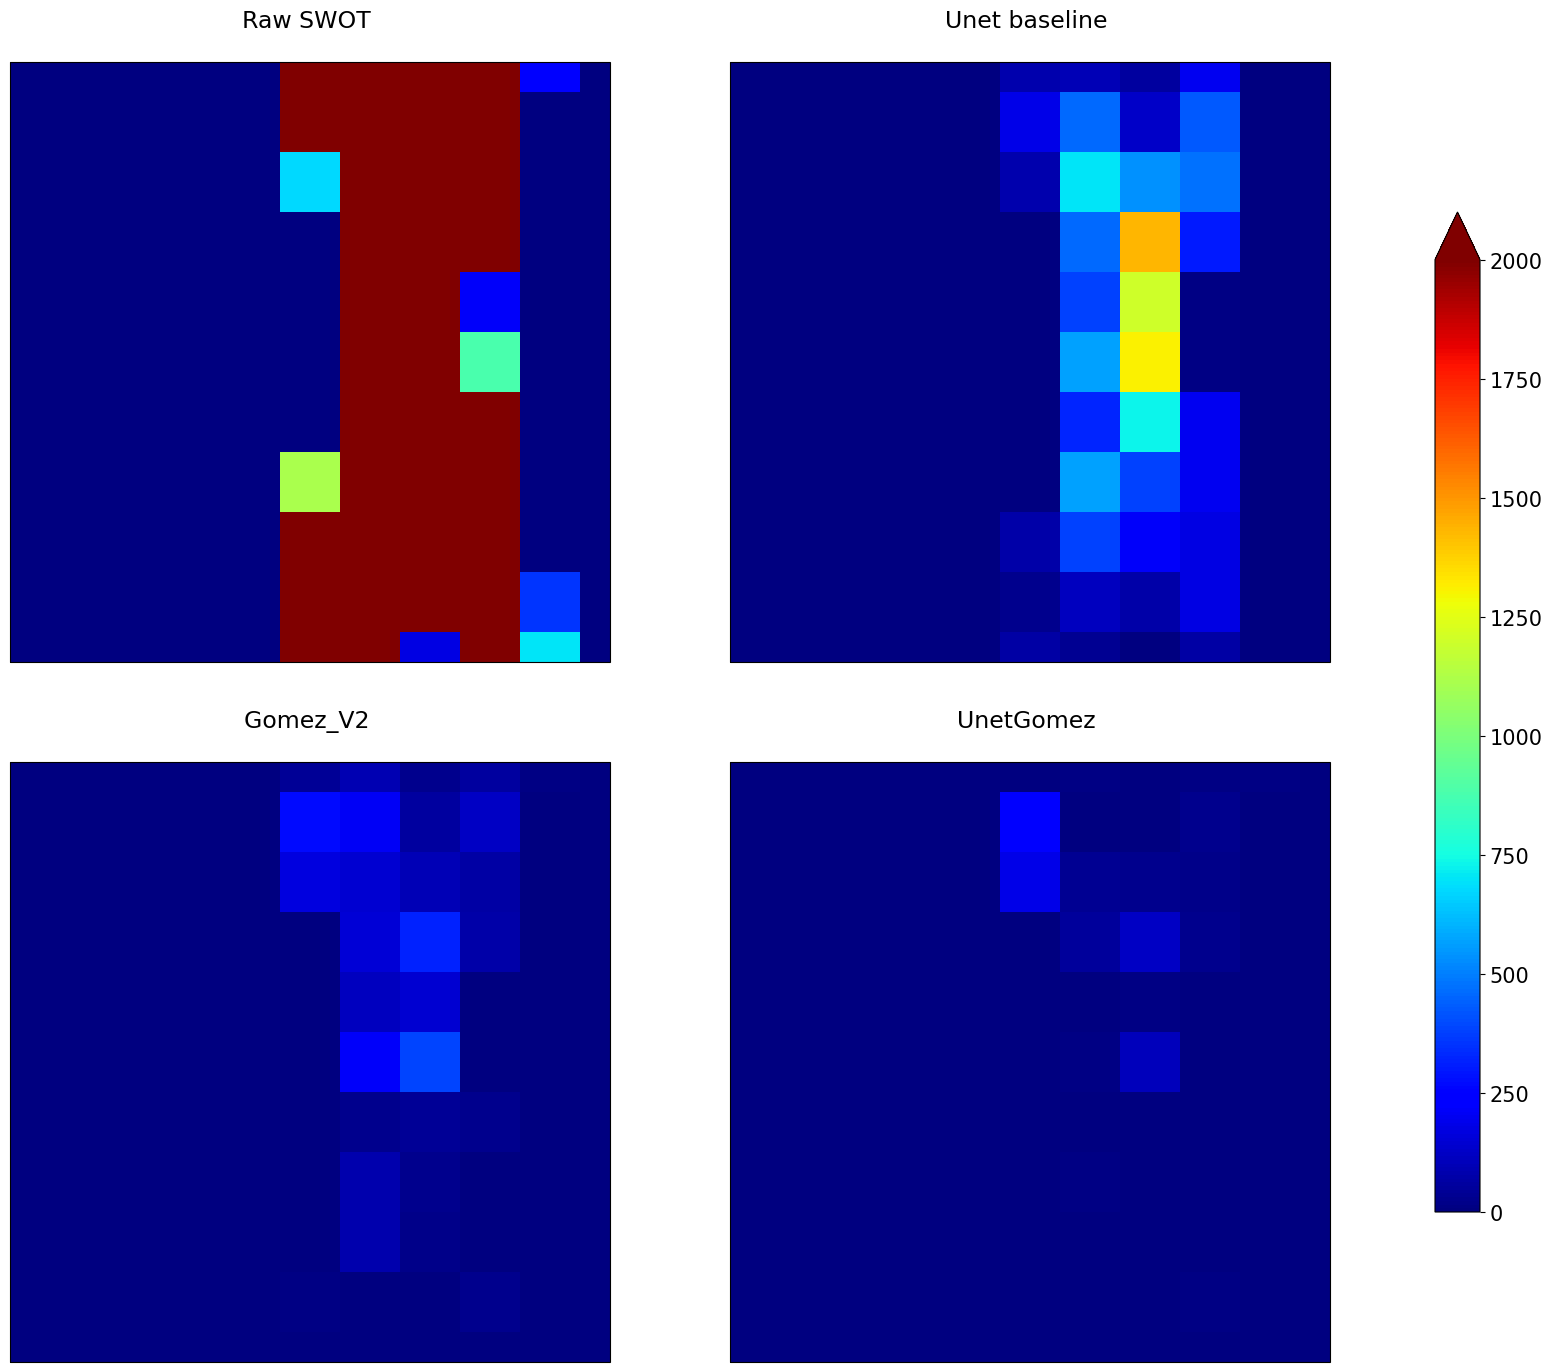

In [70]:
f = plt.figure(figsize=(18,10)) 
ax = f.add_axes([0,0.7,0.45,0.6], projection=ccrs.PlateCarree())
ax.set_title('Raw SWOT \n',fontsize=17)
xx, yy = np.meshgrid(binning1.x, 
                 binning1.y, 
                 indexing='ij')
ax.set_global()
ax.add_feature(cfeature.LAND, zorder=100, color='#969696')
mappable = ax.pcolormesh(xx,
         yy,
         sum_mask1,
         transform=ccrs.PlateCarree(),
         cmap='jet', vmin = 0, vmax = 2000 )
 

plt.xlim(region_info['lon_min'],region_info['lon_max'])
plt.ylim(region_info['lat_min'],region_info['lat_max'])


ax1 = f.add_axes([0.4,0.7,0.45,0.6], projection=ccrs.PlateCarree())
ax1.set_title('Unet baseline \n',fontsize=17)
xx, yy = np.meshgrid(binning2.x, 
                 binning2.y, 
                 indexing='ij')
ax1.set_global()
ax1.add_feature(cfeature.LAND, zorder=100, color='#969696')
mappable = ax1.pcolormesh(xx,
         yy,
         sum_mask2,
         transform=ccrs.PlateCarree(),
         cmap='jet', vmin = 0, vmax = 2000 )
 

plt.xlim(region_info['lon_min'],region_info['lon_max'])
plt.ylim(region_info['lat_min'],region_info['lat_max'])


ax2 = f.add_axes([0.,0,0.45,0.6], projection=ccrs.PlateCarree())
ax2.set_title(method_name+' \n',fontsize=17)
xx, yy = np.meshgrid(binning3.x, 
                 binning3.y, 
                 indexing='ij')
ax2.set_global()
ax2.add_feature(cfeature.LAND, zorder=100, color='#969696')
mappable = ax2.pcolormesh(xx,
         yy,
         sum_mask3,
         transform=ccrs.PlateCarree(),
         cmap='jet', vmin = 0, vmax = 2000 )
 

plt.xlim(region_info['lon_min'],region_info['lon_max'])
plt.ylim(region_info['lat_min'],region_info['lat_max'])


ax3 = f.add_axes([0.4,0,0.45,0.6], projection=ccrs.PlateCarree())
ax3.set_title(method_name2+' \n',fontsize=17)
xx, yy = np.meshgrid(binning3.x, 
                 binning3.y, 
                 indexing='ij')
ax3.set_global()
ax3.add_feature(cfeature.LAND, zorder=100, color='#969696')
mappable = ax3.pcolormesh(xx,
         yy,
         sum_mask4,
         transform=ccrs.PlateCarree(),
         cmap='jet', vmin = 0, vmax = 2000 )
 

plt.xlim(region_info['lon_min'],region_info['lon_max'])
plt.ylim(region_info['lat_min'],region_info['lat_max'])


#Colorbar 

f.subplots_adjust(right=0.8)
cbax = f.add_axes([0.85, 0.15, 0.025, 1.])
cb = f.colorbar(mappable, cax=cbax,extend='max')
cb.ax.tick_params(labelsize=15)
 
    
plt.savefig('../figures/spatdisconti_compare_'+region_info['name']+'_'+orbit+'.png',bbox_inches='tight')
    
plt.show()